<a href="https://colab.research.google.com/github/Cephandrius880/slotmachine/blob/main/Casino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np

class RandomNumberGenerator:
    def __init__(self, seed, dist="uniform", **kwargs):
        self.rng = np.random.default_rng(seed)
        self.dist = dist
        self.kwargs = kwargs

    def next(self):
        if self.dist == "uniform":
            return self.rng.random()
        elif self.dist == "normal":
            mean = self.kwargs.get("mean", 0)
            std = self.kwargs.get("std", 1)
            return self.rng.normal(loc=mean, scale=std)
        elif self.dist == "int":
            low = self.kwargs.get("low", 0)
            high = self.kwargs.get("high", 10)
            return self.rng.integers(low, high)

def jackpot_check( outcomes):
    return outcomes[0]==outcomes[1] and outcomes[1]== outcomes[2]
def small_win_check(outcomes):
  if jackpot_check(outcomes):
    return False
  else:
    return outcomes[0]==outcomes[1] or outcomes[1]==outcomes[2] or outcomes[0]==outcomes[2]



class Player():
    def __init__(self,tokens):
      self.available_tokens = tokens
      self.used_tokens = 0

    def gamble(self, slot_machine,n_tokens, game_choice=None):
      if self.available_tokens<=n_tokens:
        print(f" You have too little, your current token balance is {self.available_tokens}")
      else:
        self.available_tokens -= n_tokens
        self.used_tokens += n_tokens

      tokens_returned = slot_machine.gamble(n_tokens,game_choice=game_choice)
      if tokens_returned > n_tokens:
        message= f" You have won {tokens_returned-n_tokens}!"
      else:
        message= f" You have lost {n_tokens-tokens_returned} "
      print( message)
      self.available_tokens += tokens_returned


class SimpleSlotMachine():
    def __init__(self,n_slots=3,slot_range=range(1,11),starting_seed=42):
      self.slots = np.zeros(n_slots)
      self.slot_range = slot_range
      self.crank = [RandomNumberGenerator(starting_seed+i,dist='int',
                                                   low=min(self.slot_range),
                                                   high=max(self.slot_range))
      for i in range(n_slots)]

      self.cost_1_roll=2
      self.p_jp = 1./len(slot_range)**(n_slots-1)
      self.jackpot_amount=.5*self.cost_1_roll/self.p_jp
      self.p_sw = (len(slot_range)-1)*n_slots*self.p_jp
      self.small_win_amount=0.75*(((1-self.p_jp-self.p_sw)*self.cost_1_roll)/self.p_sw+self.cost_1_roll)



    def roll(self):
         outcomes = [x.next() for x in self.crank]
         return outcomes

    def gamble(self,n_tokens,game_choice=None):
      n_rolls = n_tokens//self.cost_1_roll
      tokens_returned = 0
      for roll in range(n_rolls):
        outcomes = self.roll()
        display = ' - '.join([str(x) for x in outcomes])
        print(f'The results are in! You have rolled {display}!')
        if jackpot_check(outcomes):
          tokens_returned += self.jackpot_amount
          message = ("Jackpot!")

        elif small_win_check(outcomes):
          tokens_returned += self.small_win_amount
          message = (' Small Win! Mini Profit!')
        else:
          message = ' Try again dingbat!'
        print(message)
      return tokens_returned




In [25]:
slot_machine = SimpleSlotMachine(3)
slot_machine2 = SimpleSlotMachine(3,starting_seed=100)
starting_amount=1000
player1 = Player(starting_amount)
player2 = Player(starting_amount)


In [27]:
p1_gamble=100
p2_gamble=50

player1_wealth=[]
player1_wealth.append(starting_amount)

player2_wealth=[]
player2_wealth.append(starting_amount)

for k in range(starting_amount//p1_gamble):
  player1.gamble(slot_machine2,n_tokens=p1_gamble)
  player1_wealth.append(player1.available_tokens)

for k in range(starting_amount//p2_gamble):
  player2.gamble(slot_machine2,n_tokens=p2_gamble)
  player2_wealth.append(player2.available_tokens)



The results are in! You have rolled 5 - 8 - 1!
 Try again dingbat!
The results are in! You have rolled 4 - 1 - 6!
 Try again dingbat!
The results are in! You have rolled 6 - 9 - 4!
 Try again dingbat!
The results are in! You have rolled 8 - 1 - 2!
 Try again dingbat!
The results are in! You have rolled 1 - 4 - 2!
 Try again dingbat!
The results are in! You have rolled 4 - 7 - 8!
 Try again dingbat!
The results are in! You have rolled 3 - 3 - 3!
Jackpot!
The results are in! You have rolled 2 - 8 - 6!
 Try again dingbat!
The results are in! You have rolled 2 - 1 - 4!
 Try again dingbat!
The results are in! You have rolled 8 - 6 - 7!
 Try again dingbat!
The results are in! You have rolled 7 - 4 - 1!
 Try again dingbat!
The results are in! You have rolled 5 - 9 - 5!
 Small Win! Mini Profit!
The results are in! You have rolled 3 - 1 - 5!
 Try again dingbat!
The results are in! You have rolled 7 - 5 - 9!
 Try again dingbat!
The results are in! You have rolled 7 - 1 - 7!
 Small Win! Mini Prof

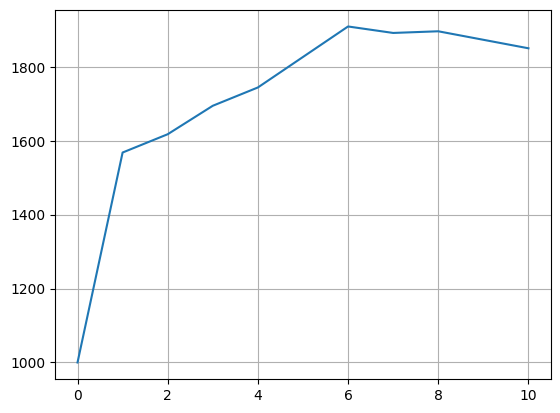

In [31]:
from matplotlib import pyplot as plt

plt.figure()
plt.plot(player1_wealth)
plt.grid()
plt.show()


In [33]:
player2_wealth

[1000,
 1624.5,
 1629.5,
 1612.5,
 1606.5,
 1606.0,
 1572.5,
 1544.5,
 1538.5,
 1538.0,
 1526.5,
 1515.0,
 1509.0,
 1603.0,
 1586.0,
 1591.0,
 1568.5,
 1546.0,
 1712.5,
 1806.5,
 1789.5]